# Tugas Besar Machine Learning
Tahap 2 (Classification)

* M. Shiba Kabul - 1301183457
* R. Ardityo Cahyo - 1301183507
* IF-42-12

In [ ]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from matplotlib import style
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from copy import deepcopy

In [ ]:
df1 = pd.read_csv('salju_test.csv')
df2 = pd.read_csv('salju_train.csv')

In [ ]:
temp = df2['id'] 
df1 = df1.assign(id=np.nan) 
df1['id'] = temp 
df1

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,id
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No,1
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes,2
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No,3
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No,4
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No,18178
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No,18179
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No,18180
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No,18181


In [ ]:
data = pd.concat([df1,df2], ignore_index=True)
data

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,id
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No,1
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes,2
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No,3
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No,4
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127272,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya,109091
127273,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya,109092
127274,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak,109093
127275,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak,109094


# Preprocessing data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127277 entries, 0 to 127276
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   127277 non-null  object 
 1   KodeLokasi                127277 non-null  object 
 2   SuhuMin                   125990 non-null  float64
 3   SuhuMax                   126183 non-null  float64
 4   Hujan                     124459 non-null  float64
 5   Penguapan                 72397 non-null   float64
 6   SinarMatahari             66180 non-null   float64
 7   ArahAnginTerkencang       118252 non-null  object 
 8   KecepatanAnginTerkencang  118307 non-null  float64
 9   ArahAngin9am              118046 non-null  object 
 10  ArahAngin3pm              123584 non-null  object 
 11  KecepatanAngin9am         125726 non-null  float64
 12  KecepatanAngin3pm         124620 non-null  float64
 13  Kelembaban9am             124945 non-null  f

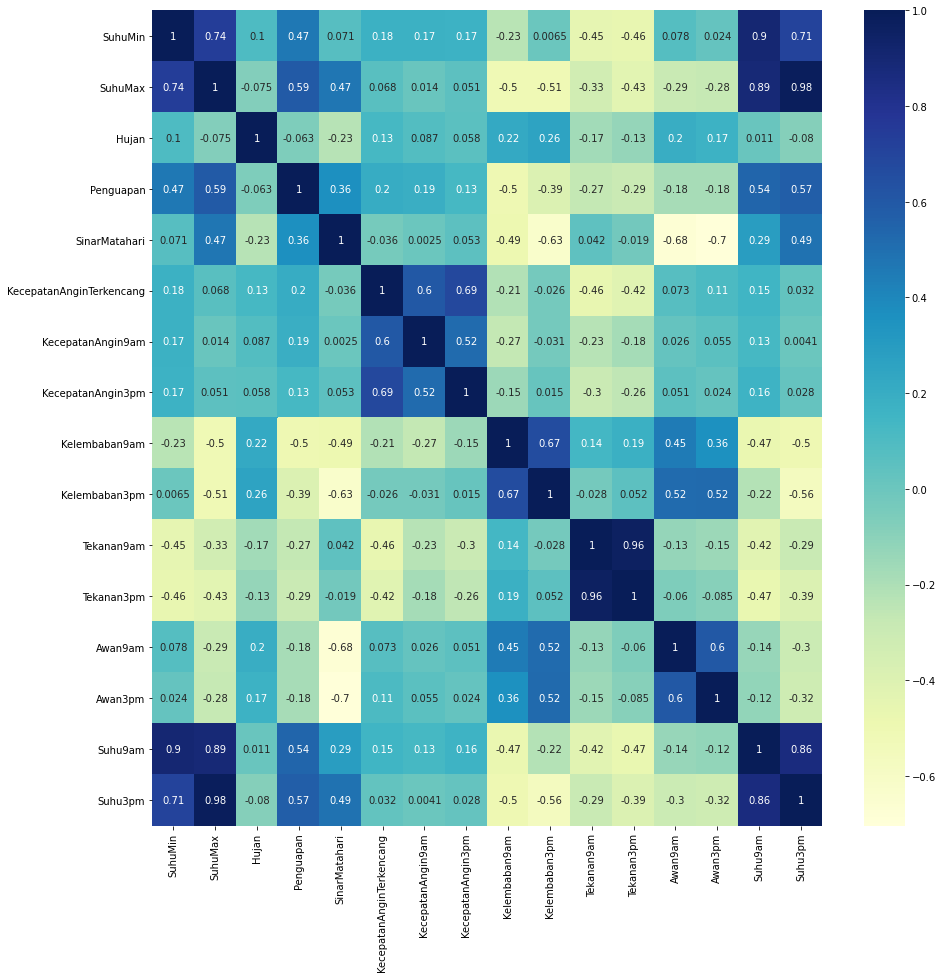

In [ ]:
corr=data.iloc[:, 0:22].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [ ]:
data["BersaljuHariIni"].value_counts()

Tidak    82670
Ya       23994
No       13830
Yes       3965
Name: BersaljuHariIni, dtype: int64

In [ ]:
data["BersaljuBesok"].value_counts()

Tidak    82701
Ya       23963
No       13824
Yes       3939
Name: BersaljuBesok, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


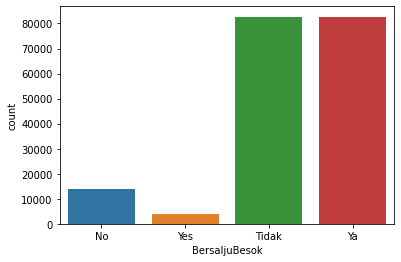

In [ ]:
sns.countplot(data['BersaljuHariIni'],label="Jumlah")
sns.countplot(data['BersaljuBesok'],label="Jumlah")

In [ ]:
# fillna data object
data['BersaljuHariIni'].replace(np.nan, 0, inplace=True) #Replace data NaN menjadi 0
data['BersaljuHariIni'].replace('No', '0',inplace=True)
data['BersaljuHariIni'].replace('Yes', '1',inplace=True)
data['BersaljuHariIni'].replace('Tidak', '0',inplace=True)
data['BersaljuHariIni'].replace('Ya', '1',inplace=True)
data['BersaljuHariIni'] = data['BersaljuHariIni'].astype(int)

data['BersaljuBesok'].replace(np.nan, 0, inplace=True) #Replace data NaN menjadi 0
data['BersaljuBesok'].replace('No', '0',inplace=True)
data['BersaljuBesok'].replace('Yes', '1',inplace=True)
data['BersaljuBesok'].replace('Tidak', '0',inplace=True)
data['BersaljuBesok'].replace('Ya', '1',inplace=True)
data['BersaljuBesok'] = data['BersaljuBesok'].astype(int)

data['ArahAngin9am'].fillna('N', inplace=True)
data['ArahAngin3pm'].fillna('SE', inplace=True)
data['ArahAnginTerkencang'].fillna('W', inplace=True)
data['KodeLokasi'].fillna('C1', inplace=True)

In [ ]:
data["BersaljuHariIni"].value_counts()

0    99318
1    27959
Name: BersaljuHariIni, dtype: int64

In [ ]:
data["BersaljuBesok"].value_counts()

0    99375
1    27902
Name: BersaljuBesok, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


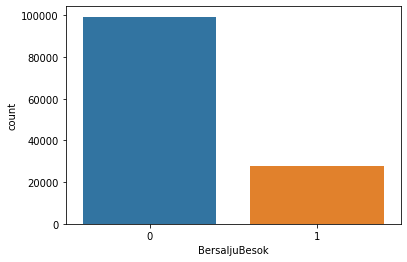

In [ ]:
sns.countplot(data['BersaljuHariIni'],label="Jumlah")
sns.countplot(data['BersaljuBesok'],label="Jumlah")

In [ ]:
# fillna data numerical
data.fillna(data.mean(), inplace=True)    

In [ ]:
data.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
id                          0
dtype: int64

In [ ]:
before_encode = data[["ArahAnginTerkencang","ArahAngin9am", "ArahAngin3pm","KodeLokasi"]]
before_encode

,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,KodeLokasi
0,WSW,W,W,C39
1,WNW,W,NW,C35
2,SSW,NE,N,C18
3,SW,E,SSE,C31
4,NW,W,WNW,C14
...,...,...,...,...
127272,ESE,SE,ESE,C38
127273,SSE,SSE,E,C16
127274,NW,N,NW,C17
127275,E,ESE,SE,C11


In [ ]:
#encode
data['ArahAngin9am']= LabelEncoder().fit_transform(data['ArahAngin9am']) 
data['ArahAngin3pm']= LabelEncoder().fit_transform(data['ArahAngin3pm']) 
data['ArahAnginTerkencang']= LabelEncoder().fit_transform(data['ArahAnginTerkencang']) 
data['KodeLokasi']= LabelEncoder().fit_transform(data['KodeLokasi']) 

data.head(3)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,id
0,04/11/2010,32,11.0,27.5,0.0,5.469173,6.400000,15,46.0,13,13,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,0,0,1
1,26/03/2015,28,10.0,19.9,0.2,5.469173,7.603905,14,56.0,13,7,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,0,1,2
2,22/03/2016,9,9.2,27.2,0.0,5.200000,10.400000,11,33.0,4,3,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0,3


In [ ]:
after_encode = data[["ArahAnginTerkencang","ArahAngin9am", "ArahAngin3pm","KodeLokasi"]]
after_encode

,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,KodeLokasi
0,15,13,13,32
1,14,13,7,28
2,11,4,3,9
3,12,0,10,24
4,7,13,14,5
...,...,...,...,...
127272,2,9,2,31
127273,10,10,0,7
127274,7,3,7,8
127275,0,2,9,2


# Atribut untuk modeling

In [ ]:
import copy

var = data[["SuhuMax", "Suhu3pm","BersaljuBesok"]]
data_baru = var.copy()
data_baru

,SuhuMax,Suhu3pm,BersaljuBesok
0,27.5,23.6,0
1,19.9,18.9,1
2,27.2,26.3,0
3,27.0,26.4,0
4,7.9,6.0,0
...,...,...,...
127272,23.7,22.1,1
127273,25.2,24.4,1
127274,20.4,19.8,0
127275,29.8,29.2,0


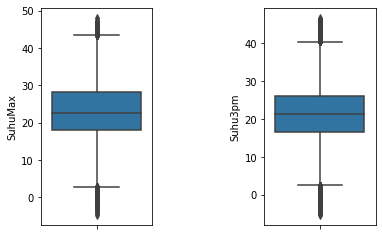

In [ ]:
f, axes = plt.subplots(1,2)
sns.boxplot(y=data_baru["SuhuMax"], ax=axes[0])
sns.boxplot(y=data_baru["Suhu3pm"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Mengatasi Outlier

In [ ]:
z = np.abs(stats.zscore(data_baru[['SuhuMax','Suhu3pm']]))
threshold = 3
data_baru= data_baru[(z < 3).all(axis=1)]
print(z)

[[0.60335199 0.2794405 ]
 [0.46961355 0.40721567]
 [0.56099809 0.67390255]
 ...
 [0.39902371 0.27572832]
 [0.92806525 1.09758402]
 [0.58923402 0.23561138]]


In [ ]:
data_baru.shape

(126824, 3)

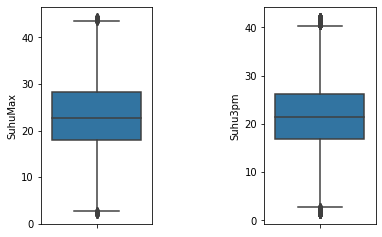

In [ ]:
#after clean
f, axes = plt.subplots(1,2)
sns.boxplot(y=data_baru["SuhuMax"], ax=axes[0])
sns.boxplot(y=data_baru["Suhu3pm"], ax=axes[1])
plt.subplots_adjust(wspace=1)

# Feature Engineering

In [ ]:
data_baru = var.drop(['BersaljuBesok'], axis=1)
targetclass = var['BersaljuBesok']
targetclass.head(3)

0    0
1    1
2    0
Name: BersaljuBesok, dtype: int64

In [ ]:
data_baru

,SuhuMax,Suhu3pm
0,27.5,23.6
1,19.9,18.9
2,27.2,26.3
3,27.0,26.4
4,7.9,6.0
...,...,...
127272,23.7,22.1
127273,25.2,24.4
127274,20.4,19.8
127275,29.8,29.2


Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaling = scaler.fit_transform(data_baru)
col_new = ["SuhuMax","Suhu3pm"]
datascalling = pd.DataFrame(scaling,columns=col_new)
datascalling

,SuhuMax,Suhu3pm
0,0.610586,0.556622
1,0.466919,0.466411
2,0.604915,0.608445
3,0.601134,0.610365
4,0.240076,0.218810
...,...,...
127272,0.538752,0.527831
127273,0.567108,0.571977
127274,0.476371,0.483685
127275,0.654064,0.664107


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Membagi data menjadi 30:70
x_train, x_test, y_train, y_test = train_test_split(datascalling, targetclass, test_size = 0.3, random_state = 123)

In [ ]:
print("Xtrain Value")
print(x_train)
print("Xtest Value")
print(x_test)
print("ytrain Value")
print(y_train)
print("ytest Value")
print(y_test)

Xtrain Value
         SuhuMax   Suhu3pm
89229   0.510397  0.508637
124121  0.474480  0.468330
70125   0.264650  0.259117
38195   0.697543  0.694818
66505   0.689981  0.681382
...          ...       ...
61404   0.455577  0.454894
17730   0.410208  0.416507
28030   0.376181  0.387716
15725   0.534972  0.512476
118270  0.370510  0.341651

[89093 rows x 2 columns]
Xtest Value
         SuhuMax   Suhu3pm
90023   0.434783  0.519910
116093  0.476371  0.477927
43582   0.436673  0.416507
110534  0.587902  0.598848
26645   0.648393  0.652591
...          ...       ...
92966   0.538752  0.529750
650     0.393195  0.389635
91937   0.621928  0.591171
735     0.661626  0.658349
108691  0.366730  0.355086

[38184 rows x 2 columns]
ytrain Value
89229     1
124121    0
70125     1
38195     0
66505     0
         ..
61404     0
17730     0
28030     0
15725     0
118270    0
Name: BersaljuBesok, Length: 89093, dtype: int64
ytest Value
90023     0
116093    0
43582     0
110534    0
26645     0
         

# Pemodelan

Eksperimen 1: Menggunakan Metode Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
#Create a Gaussian Classifier
naive = GaussianNB()

# Train the model using the training sets
naive.fit(x_train, y_train)

#Predict Output
n_predict = naive.predict(x_test)
print("Class Prediction\n")
gaussian_score = accuracy_score(y_test,n_predict)
print("ACCURACY ",gaussian_score)
gaussian_precision = precision_score(y_test,n_predict)
print("PRECISION ",gaussian_precision)

Class Prediction

ACCURACY  0.7750366645715483
PRECISION  0.412861136999068


In [ ]:
print(classification_report(y_test, n_predict))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     29781
           1       0.41      0.05      0.09      8403

    accuracy                           0.78     38184
   macro avg       0.60      0.52      0.48     38184
weighted avg       0.70      0.78      0.70     38184



Eksperimen 2: Menggunakan Metode Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
#Create a Random Forrest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Predict Output
r_predict = rf.predict(x_test)
print("Class Prediction\n")
rf_score = accuracy_score(y_test,r_predict)
print("ACCURACY ",rf_score)
rf_precision = precision_score(y_test,r_predict)
print("PRECISION ",rf_precision)

Class Prediction

ACCURACY  0.7718416090509114
PRECISION  0.45194401244167964


In [ ]:
print(classification_report(y_test, r_predict))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     29781
           1       0.45      0.17      0.25      8403

    accuracy                           0.77     38184
   macro avg       0.63      0.56      0.56     38184
weighted avg       0.72      0.77      0.73     38184



# Evaluasi

**Naive Bayes**

ACCURACY:  0.7750366645715483 - 78%

PRECISION:  0.412861136999068 - 41%

**Random Forest**

ACCURACY:  0.7707154829247852 - 77%

PRECISION:  0.4458128078817734 - 45%